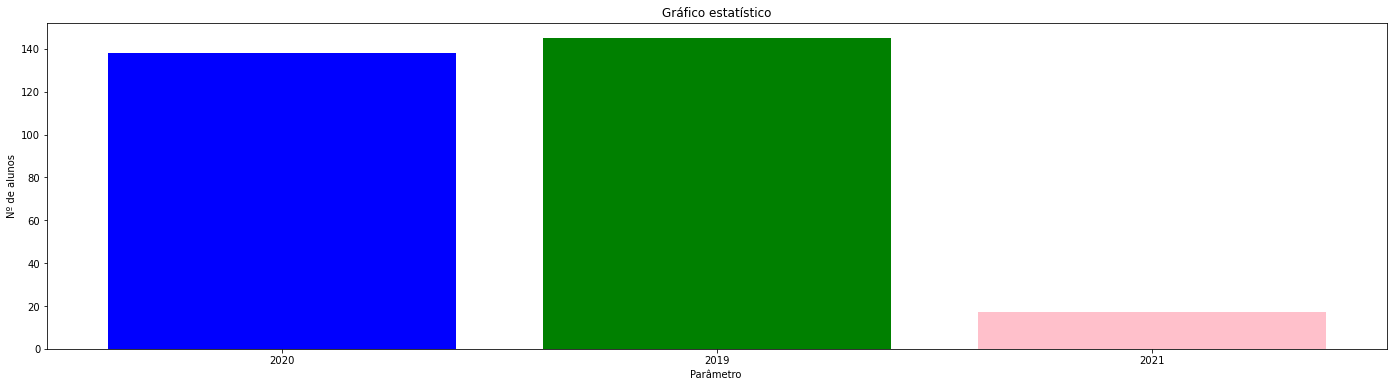

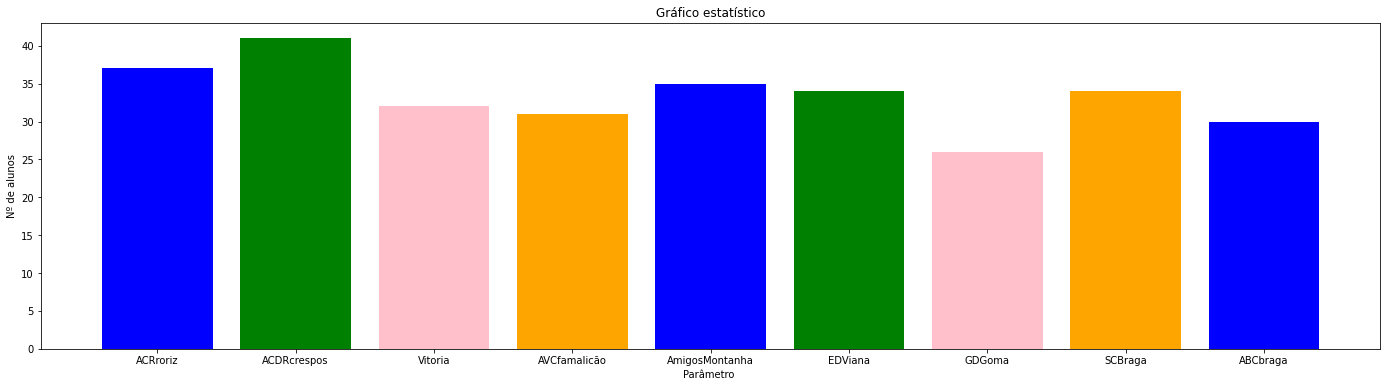

dict_keys(['BTT', 'Ciclismo', 'Basquetebol', 'Andebol', 'Futebol', 'Atletismo', 'Equitação', 'Patinagem', 'Orientação', 'Triatlo', 'Dança', 'Karaté', 'Badminton', 'Esgrima', 'Parapente'])


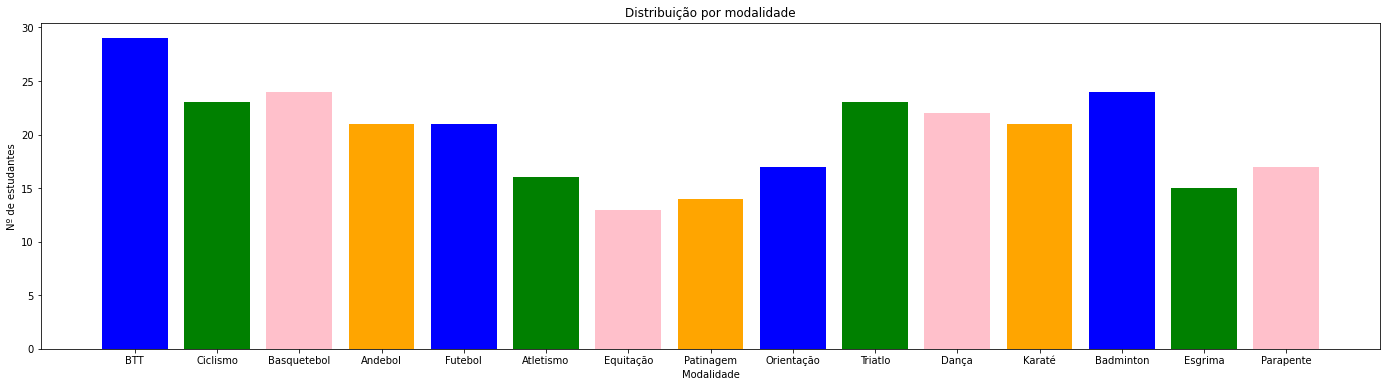

OK

{'_bd': 'emd.csv', '_imprime': []}


In [2]:
# BdEMD = [EMD]
# EMD = [_id,dataEMD,pnome,unome,idade,género,morada,modalidade,clube,email,federado,resultado]

# Leitura/carregamento da informação do ficheiro
import matplotlib.pyplot as plt
import os
def getEMD (linha):
    emd = []
    novaLinha= linha.replace("\n", "")
    campos = novaLinha.split(",")
    emd.append("emd"+ str(int(campos[1])+1))
    for i in range (2,len(campos)):
        emd.append(campos[i])
    return emd

def lerDataset(fnome):
    f = open(fnome, encoding="utf-8")
    emd = []
    f.readline()
    for linha in f:
        emd.append(getEMD(linha))
    return emd

# Listagem da informação
def chaveOrd(exame):
    return exame[1]

def listarDataset(bd):
    bd.sort(key=chaveOrd, reverse=True)
    print ("id        date         nome        apto")
    print("_____________________________________")
    for e in bd:
        print (e[0] + " | " + e[1] + " | " +
        e[3] + e[2] + " | "
              + e[11])
    return

# Consulta de um registo
def consultarDataset(bd, id):
    i=0
    while bd[i][0]!=id:
        i= i+1
    return bd[i]

def modalidades(bd):
    lista= []
    for emd in bd:
        if emd[7] not in lista:
            lista.append(emd[7])
    lista.sort()
    return lista

def distribPorModalidade(bd):
    distribuicao = {}
    for emd in bd:
        if emd [7] in distribuicao.keys():
            distribuicao[emd[7]] = distribuicao[emd[7]] + 1
        else:
            distribuicao[emd[7]] = 1
    return distribuicao
            
def distribPorClube(bd):
    distribuicao = {}
    for emd in bd:
        if emd [8] in distribuicao.keys():
            distribuicao[emd[8]] = distribuicao[emd[8]] + 1
        else:
            distribuicao[emd[8]] = 1
    return distribuicao
    
def distribPorAno(bd):
    distribuicao = {}
    for emd in bd:
        if emd [1][0:4] in distribuicao.keys():
            distribuicao[emd[1][0:4]] = distribuicao[emd[1][0:4]] + 1
        else:
            distribuicao[emd[1][0:4]] = 1
    return distribuicao

def distrib(bd, n):
    distribuicao={}
    for e in bd:
        if e[n] in distribuicao.keys():
            distribuicao[e[n]] += 1
        else:
            distribuicao[e[n]] = 1
    return distribuicao

#Gráficos    
def plotDistribPorModalidade(dm):
    dm= distribPorModalidade(bd)
    left = []
    k=dict.keys(dm)
    v=dict.values(dm)
    tick_label=[]
    height = []
    
    for l in range(0,len(dm)):
        left.append(l)
    
    for value in v:    
        height.append(value)
    print(k)
    for key in k:
        tick_label.append(key)
    
    plt.figure(1, figsize=(24, 6))
    plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['blue', 'green', 'pink','orange'])
 

    plt.xlabel('Modalidade')

    plt.ylabel('Nº de estudantes')

    plt.title('Distribuição por modalidade')
 
    plt.show()

def plotDistrib(bd, n):
    d={}
    
    if n == 1:
        for e in bd:
            if e[1][0:4] in dict.keys(d):
                d[e[1][0:4]] += 1
            else:
                d[e[1][0:4]] = 1
    else:
        for e in bd:
            if e[n] in dict.keys(d):
                d[e[n]] += 1
            else:
                d[e[n]] = 1
    
    left = []
    k=dict.keys(d)
    v=dict.values(d)
    tick_label=[]
    height = []
    
    for l in range(0,len(d)):
        left.append(l)
    
    for value in v:    
       # print(value)
        height.append(value)
        #print(height)
    #print(k)
    for key in k:
        tick_label.append(key)
    
    plt.figure(1, figsize=(24, 6))
    plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['blue', 'green', 'pink','orange'])
 

    plt.xlabel('Parâmetro ')

    plt.ylabel('Nº de alunos')

    plt.title('Gráfico estatístico')
 

    plt.show()
    
#Interface Gráfica    
import PySimpleGUI as sg
def janelaErro(mensagem):
    layout=[[sg.Text(mensagem)], [sg.Button("Ok")]]
    window= sg.Window(title="Mesagem de erro", font="Arial 20", default_element_size=(15,1)).Layout(layout)

    stop=False  
    while not stop:
        event, values = window.read()
        if event == "Ok" or event == sg.WIN_CLOSED:
            stop = True

    window.close()

#abertura de listas necessárias para a janela
bd=[]
imprime=[]

layout = [[sg.Column([[sg.InputText("Introduza o nome da base de dados", key='_bd')],
            [sg.Button("Carregar Base de Dados")], 
            [sg.Button("Modalidades")],
            [sg.Button("Distribuições")],
            [sg.Button("OK")]]), sg.Listbox(values=imprime, size=(35,12), key='_imprime')]]


window = sg.Window("APP",font="Helvetica 15").Layout(layout)
stop = False

while not stop:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event=="OK":
        stop = True
    if event=="Carregar Base de Dados":
        bd=[]        #apaga qualquer registo uma bd carregada anteriormente
        if os.path.exists(values['_bd']) == True:     #verifica a existencia do ficheiro
            bd=lerDataset(values['_bd'])      
            imprime.append('Foram carregados ' + str(len(bd))+ ' registos!')
            window.find_element('_imprime').Update(values=imprime)
        else: 
            janelaErro("Não existe nenhuma base de dados com esse nome!")
        imprime=[]

    elif event=="Modalidades":
        if len(bd)==0:              #se nenhuma bd foi inserida
            janelaErro("Não foi carregada nenhuma base de dados!")
        else:
            for elem in modalidades(bd):             
                imprime.append(elem)
            window.find_element('_imprime').Update(values=imprime)
        imprime=[]

    elif event=="Distribuições":
        formLayout = [
          [sg.Button('Por ano')],
          [sg.Button('Por clube')],
          [sg.Button('Por modalidades')]]

        wform = sg.Window('Distribuições', formLayout)
        inputEvent, inputValues = wform.read(close=True)
        wform.close()
        if inputEvent == 'Por modalidades':
            if len(bd)==0:
                janelaErro("Não foi carregada nenhuma base de dados!")
            else:
                plotDistribPorModalidade(bd)
                modalidades=distribPorModalidade(bd)
                for c in modalidades.keys():
                    imprime.append(c +" - " +str(modalidades[c]) + "\n")
                window.find_element('_imprime').update(values=imprime)
                imprime=[] 
        elif inputEvent == 'Por ano':
            if len(bd)==0:
                janelaErro("Não foi carregada nenhuma base de dados!")
            else:
                plotDistrib(bd,1)
                ano=distribPorAno(bd)
                for c in ano.keys():
                    imprime.append(c +" - " +str(ano[c]) + "\n")
                window.find_element('_imprime').update(values=imprime)
                imprime=[]
        elif inputEvent == 'Por clube':
            if len(bd)==0:
                janelaErro("Não foi carregada nenhuma base de dados!")
            else:
                plotDistrib(bd,8)
                clube=distribPorClube(bd)
                for c in clube.keys():
                    imprime.append(c +" - " +str(clube[c]) + "\n")
                window.find_element('_imprime').update(values=imprime)
                imprime=[]
    else: 
        print(event + "\n")
        print(values)


        
window.close()

bd=[]     #limpa memória